<a href="https://colab.research.google.com/github/leemichaelwaters/ml-examples/blob/main/4_Image_classification_of_CIFAR_10_dataset_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
- Import CIFAR-10 dataset and show first 20 images
- Reshape label vectors to 1D
- Split data into two sets based on class label in order to build two different NN (base vs. feature extraction models)
- Scale the label vectors so that 0 represents the first class label
- Normalize the pixel values of all images [0, 1]
- Build CNN model_1 using a stack of Conv2D (64 filters of size (3, 3) with ReLU activation), Conv2D (64 filters of size (3, 3) with ReLU activation), MaxPooling 2D (pool size of (2, 2)), dropout (rate of 0.25), dense (128 hidden units with ReLU activation), and output layer
- Compile and train the model on one subset of training images for 20 epochs and batch size of 128
- Plot training accuracy w.r.t. epoch number
- Test model_1 on subset of testing images and observe accuracy of 76%
- Build CNN model_2 by reusing the pre-trained convolutional base layers of model_1 and stacking up new dense and output layers with the same architecture as those of model_1
- Freeze base layers prior to training
- Compile model_2 and train it on second subset of training images for 20 epochs and batch size of 128
- Plot training accuracy w.r.t. epoch number
- Test model_2 on second subset of testing images and observe accuracy of 75%
- model_1 and model_2 have similar performance which demonstrates that model_2 can largely reuse most of model_1’s parameters without sacrificing performance (i.e. transfer learning using feature extraction)

# Import data

In [ ]:
# Import packages
from keras.datasets import cifar10
from matplotlib import pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


# Exploratory data anlaysis

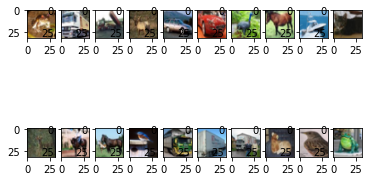

In [ ]:
# Plot first few images
for i in range(20):
	# Define subplot
	plt.subplot(2, 10, i+1)
	# Plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# Show the figure
plt.show()

In [ ]:
# Import packages
from tensorflow.keras.utils import to_categorical

# Print out shapes
print('Original Shape:')
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
print("")

# Reshape label vectors to 1D
train_labels = train_labels.reshape(50000)
test_labels = test_labels.reshape(10000)

# Print out shapes
print('New Shape:')
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Find indices of images that have class labels < 5 and class labels >= 5
train_index_less = train_labels < 5
train_index_more = train_labels >= 5

test_index_less = test_labels < 5
test_index_more = test_labels >= 5 

Original Shape:
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)

New Shape:
Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


# Train and test model

In [ ]:
# Split training/testing dataset into two subsets
# One with class labels < 5 and one with class labels >= 5
train_images_less = train_images[train_index_less]
train_images_more = train_images[train_index_more]

train_labels_less = train_labels[train_index_less]
train_labels_more = train_labels[train_index_more]

test_images_less = test_images[test_index_less]
test_images_more = test_images[test_index_more]

test_labels_less = test_labels[test_index_less]
test_labels_more = test_labels[test_index_more]

# Print out shapes
print('Shapes of new subsets:')

print('Train < 5: X=%s, y=%s' % (train_images_less.shape, train_labels_less.shape))
print('Test < 5: X=%s, y=%s' % (test_images_less.shape, test_labels_less.shape))

print('Train >= 5: X=%s, y=%s' % (train_images_more.shape, train_labels_more.shape))
print('Test >= 5: X=%s, y=%s' % (test_images_more.shape, test_labels_more.shape))

Shapes of new subsets:
Train < 5: X=(25000, 32, 32, 3), y=(25000,)
Test < 5: X=(5000, 32, 32, 3), y=(5000,)
Train >= 5: X=(25000, 32, 32, 3), y=(25000,)
Test >= 5: X=(5000, 32, 32, 3), y=(5000,)


In [ ]:
# Import packages
from tensorflow.keras.utils import to_categorical

# Subtract 5 from label vectors >= 5
train_labels_more -= 5
test_labels_more -= 5

# Transform labels into one-hot encoding form
train_labels_less = to_categorical(train_labels_less)
train_labels_more = to_categorical(train_labels_more)
test_labels_less = to_categorical(test_labels_less)
test_labels_more = to_categorical(test_labels_more)

# Normalize the pixel values
train_images_less = train_images_less.astype('float32') / 255
train_images_more = train_images_more.astype('float32') / 255
test_images_less = test_images_less.astype('float32') / 255
test_images_more = test_images_more.astype('float32') / 255

In [ ]:
# Import packages
from keras import layers
from keras import models

# Build CNN model_1
model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(5, activation='softmax'))

# Display model architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

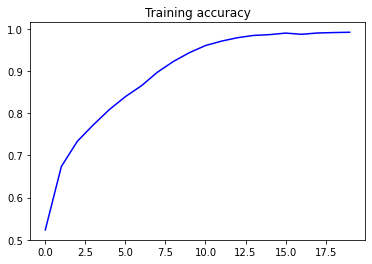

In [ ]:
# Compile model
model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit model
history = model_1.fit(train_images_less, train_labels_less, epochs=20, batch_size=128, verbose=0)

# Plot training accuracy w.r.t. epochs
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.show()

In [ ]:
# Test model
test_loss_less, test_acc_less = model_1.evaluate(test_images_less, test_labels_less)

157/157 [==============================] - 1s 4ms/step - loss: 1.5606 - accuracy: 0.7656


In [ ]:
# Import packages
from keras.models import clone_model

# Clone a new model from an existing model
model_2 = clone_model(model_1)

# Freeze all layers except the last two layers
for layer in model_2.layers[:-2]:
  layer.trainable = False

# Display model architecture
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

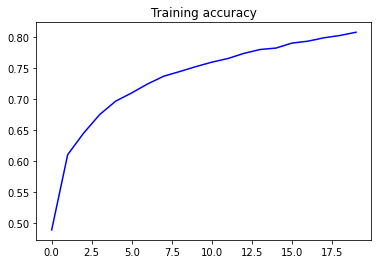

In [ ]:
# Compile model
model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit model
history = model_2.fit(train_images_more, train_labels_more, epochs=20, batch_size=128, verbose=0)

# Plot model accuracy w.r.t epochs
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.show()

In [ ]:
# Test model
test_loss_more, test_acc_more = model_2.evaluate(test_images_more, test_labels_more)

157/157 [==============================] - 1s 3ms/step - loss: 0.6751 - accuracy: 0.7476


Sources:
* https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/